In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline

#Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the files.
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
#Read the files.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Inspect the city data DataFrame

In [5]:
# Get the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
(city_data_df['type'] =='Urban').sum()

66

In [10]:
# Get the number of data points from the Suburban cities.
(city_data_df['type'] =='Suburban').sum()

36

In [11]:
# Get the number of data points from the Rural cities.
(city_data_df['type'] =='Rural').sum()

18

In [12]:
# Inspect the ride data DataFrame.

In [13]:
# Get the columns and rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combine the data into a single DataFrame.
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

In [18]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

In [19]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [20]:
# Calculate the total number of rides by city for each city type.
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [21]:
# Calculate the average fare by city for each city type.
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']

In [22]:
# Get the average driver count by city for each city type.
urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

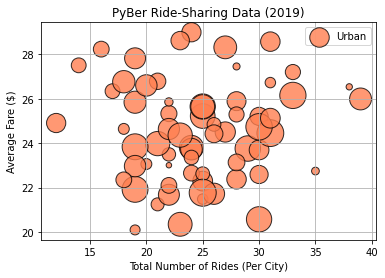

In [23]:
# Create the urban cities scatter plot.  
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, edgecolors='black', linewidths=1, color='coral', alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

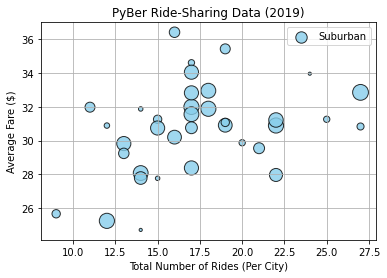

In [24]:
# Create the suburban cities scatter plot.  
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, edgecolors='black', linewidths=1, color='skyblue', alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

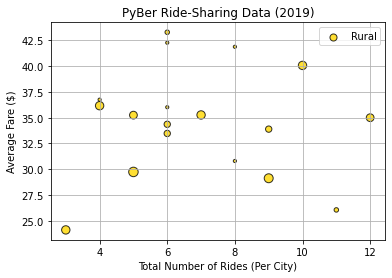

In [25]:
# Create the rural cities scatter plot.  
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, edgecolors='black', linewidths=1, color='gold', alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

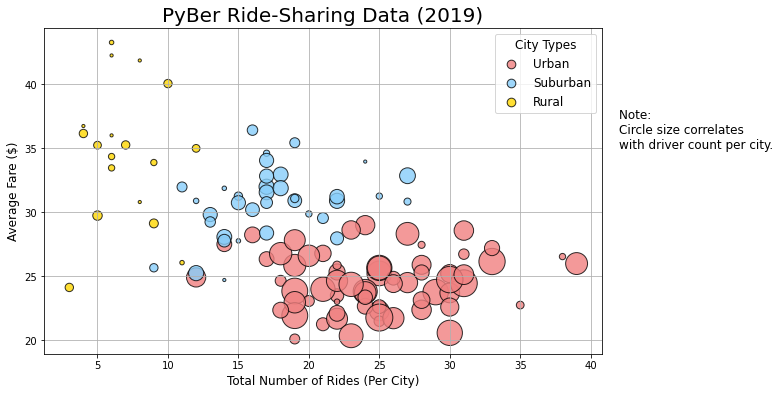

In [26]:
# Create the urban cities scatter plot.  
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, edgecolors='black', linewidths=1, color='lightcoral', alpha=0.8, label='Urban')

# Create the suburban cities scatter plot.  
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, edgecolors='black', linewidths=1, color='lightskyblue', alpha=0.8, label='Suburban')

# Create the rural cities scatter plot.  
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, edgecolors='black', linewidths=1, color='gold', alpha=0.8, label='Rural')

# Add labels and formatting to the chart
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Create a legend.
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize='12')

# Save the figure.
plt.savefig("Analysis/Fig1.png", bbox_inches="tight")

# Show the plot.
plt.show()

In [27]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
# Get summary statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
# Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
# Calculate the mean of the ride count fo each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [32]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [33]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [34]:
# Import Numpy and the stats mosule form SciPy
import numpy as np
import scipy.stats as sts

In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [37]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [38]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    31.25
2    19.89
3    24.28
4    13.89
Name: fare, dtype: float64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [40]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    30.38
1627    36.13
1628    44.24
1629    36.49
Name: fare, dtype: float64

In [41]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [42]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    58.55
2252    25.78
2253    10.37
2254    10.79
Name: fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [44]:
# Get the driver count from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [45]:
# Calculate the measures of central tendency for the drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban trips is {mode_urban_drivers}.")

The mean drivers for urban trips is $36.68.
The median drivers for urban trips is $37.00.
The mode drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [46]:
# Get the driver count from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    11
1627    11
1628    11
1629    11
Name: driver_count, dtype: int64

In [47]:
# Calculate the measures of central tendency for the drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban trips is {mode_suburban_drivers}.")

The mean drivers for suburban trips is $13.71.
The median drivers for suburban trips is $16.00.
The mode drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [48]:
# Get the driver count from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    9
2252    9
2253    9
2254    9
Name: driver_count, dtype: int64

In [49]:
# Calculate the measures of central tendency for the drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for rural trips is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural trips is {mode_rural_drivers}.")

The mean drivers for rural trips is $4.30.
The median drivers for rural trips is $4.00.
The mode drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


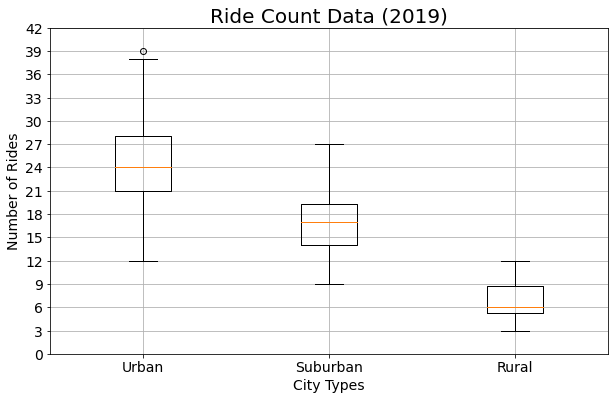

In [68]:
# Create a box-and-whisker plot for the ride count.
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
          
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig('Analysis/Fig2.png', bbox_inches="tight")
plt.show()

In [51]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


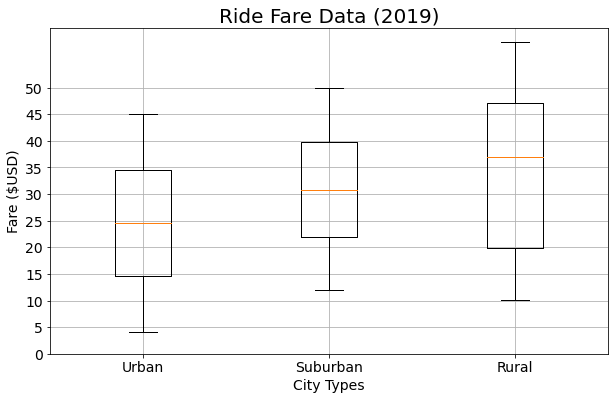

In [69]:
# Create a box-and-whisker plot for the fare data.
x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
          
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()

# Save the figure.
plt.savefig('Analysis/Fig3.png', bbox_inches="tight")
plt.show()

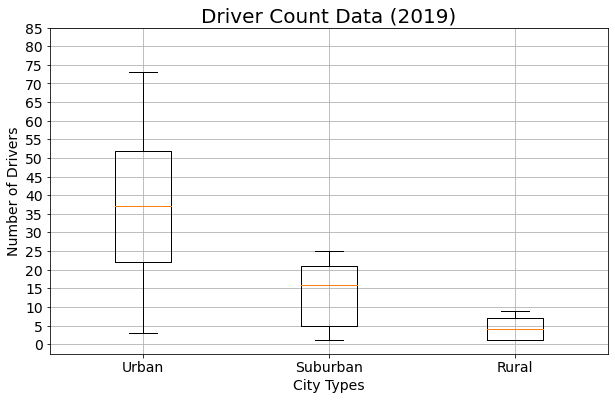

In [70]:
# Create a box-and-whisker plot for the driver count data.
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)
          
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

# Save the figure.
plt.savefig('Analysis/Fig4.png', bbox_inches="tight")
plt.show()

In [54]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby('type').sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [55]:
# Get the sum of all the fares.
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [56]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

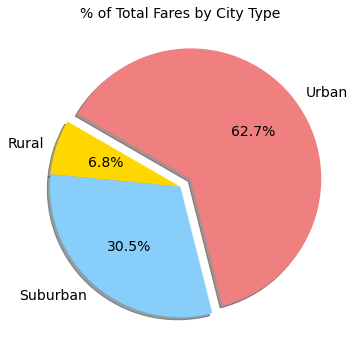

In [73]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Fares by City Type', fontsize=14)

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig('Analysis/Fig5.png', bbox_inches="tight")

#Show Figure
plt.show()

In [58]:
# Get the sum of the total rides for each city type.
sum_rides_by_type = pyber_data_df.groupby('type').count()['ride_id']
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [59]:
# Get the sum of all the rides.
total_rides = pyber_data_df['ride_id'].count()
total_rides

2375

In [60]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * sum_rides_by_type / total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

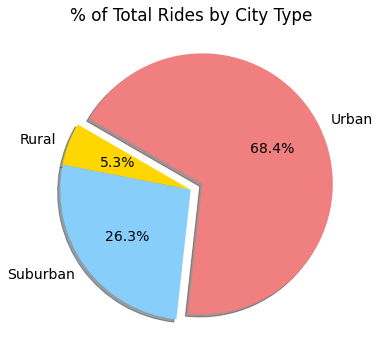

In [66]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Rides by City Type')

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig('Analysis/Fig6.png', bbox_inches="tight")

#Show Figure
plt.show()

In [62]:
# Get the sum of the total drivers for each city type.
sum_drivers_by_type = city_data_df.groupby('type').sum()['driver_count']
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [63]:
# Get the sum of all the drivers.
total_drivers = city_data_df['driver_count'].sum()
total_drivers

2973

In [64]:
# Calculate the percentage of rides for each city type.
driver_percents = 100 * sum_drivers_by_type / total_drivers
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

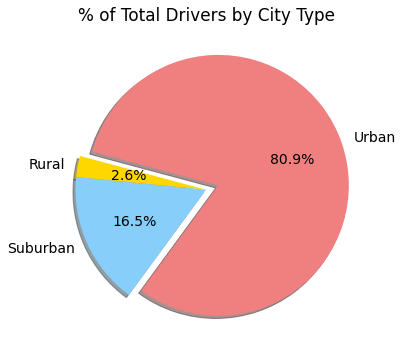

In [67]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build the percentage of drivers by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=165)
plt.title('% of Total Drivers by City Type')

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig('Analysis/Fig7.png', bbox_inches="tight")

#Show Figure
plt.show()